# Example of composites

Create a visualization of true color and CIR composites using our images.

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functions import load_scene, rgb_composite, composite

Load the pre-cropped scene for plotting.

In [2]:
liverpool = load_scene(
    Path("../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/"),
    pattern="[2-5]",
)

In [3]:
band_names = {
    1: "Aerosol",
    2: "Blue",
    3: "Green",
    4: "Red",
    5: "NIR",
    6: "SWIR 1",
    7: "SWIR 2",
    10: "Thermal",
}

## RBG

In [4]:
truecolor = rgb_composite(liverpool, in_range=(5000, 18000))

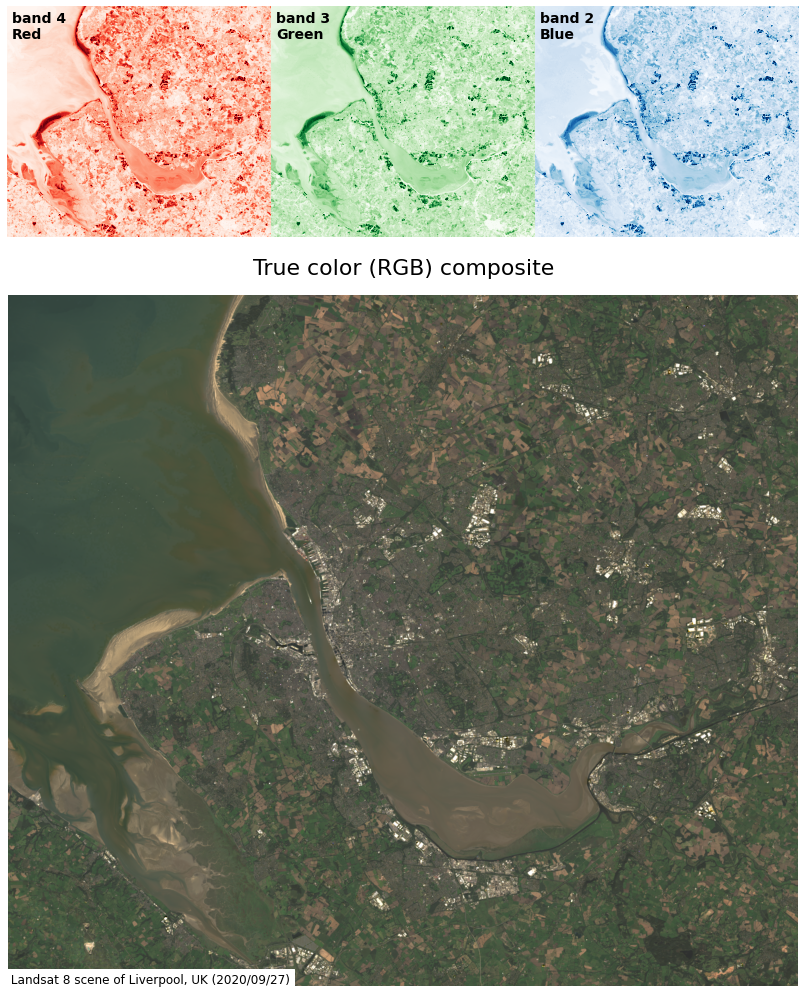

In [5]:
fig = plt.figure(figsize=(11, 14.4))
grid = GridSpec(3, 3, figure=fig, wspace=0, hspace=0)
axes =[
    fig.add_subplot(grid[0, 0]),
    fig.add_subplot(grid[0, 1]),
    fig.add_subplot(grid[0, 2]),
]
cmaps = ["Reds", "Greens", "Blues"]
for ax, band, cmap in zip(axes, [4, 3, 2], cmaps):    
    vmin, vmax = np.percentile(liverpool[band], (1, 99))
    ax.imshow(liverpool[band], cmap=cmap, vmin=vmin, vmax=vmax)
    ax.axis("off")
    ax.text(
        30, 30, 
        f"band {band}\n{band_names[band]}", 
        color="black", 
        fontweight="bold", 
        fontsize=14,
        verticalalignment="top",
    )    
ax = fig.add_subplot(grid[1:, 0:])
ax.axis("off")
ax.imshow(truecolor)
ax.set_title("True color (RGB) composite", fontsize=22, pad=20)

fig.text(0, 0, 
    " Landsat 8 scene of Liverpool, UK (2020/09/27)", 
    color="black", 
    fontweight="normal", 
    fontsize=12,
    verticalalignment="bottom",
    backgroundcolor="white",
)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("../lectures/images/rgb-composite-liverpool.svg", bbox_inches="tight", pad_inches=0)

## CIR

In [6]:
cir = composite(liverpool, bands=[5, 4, 3], in_range=(5000, 18000))

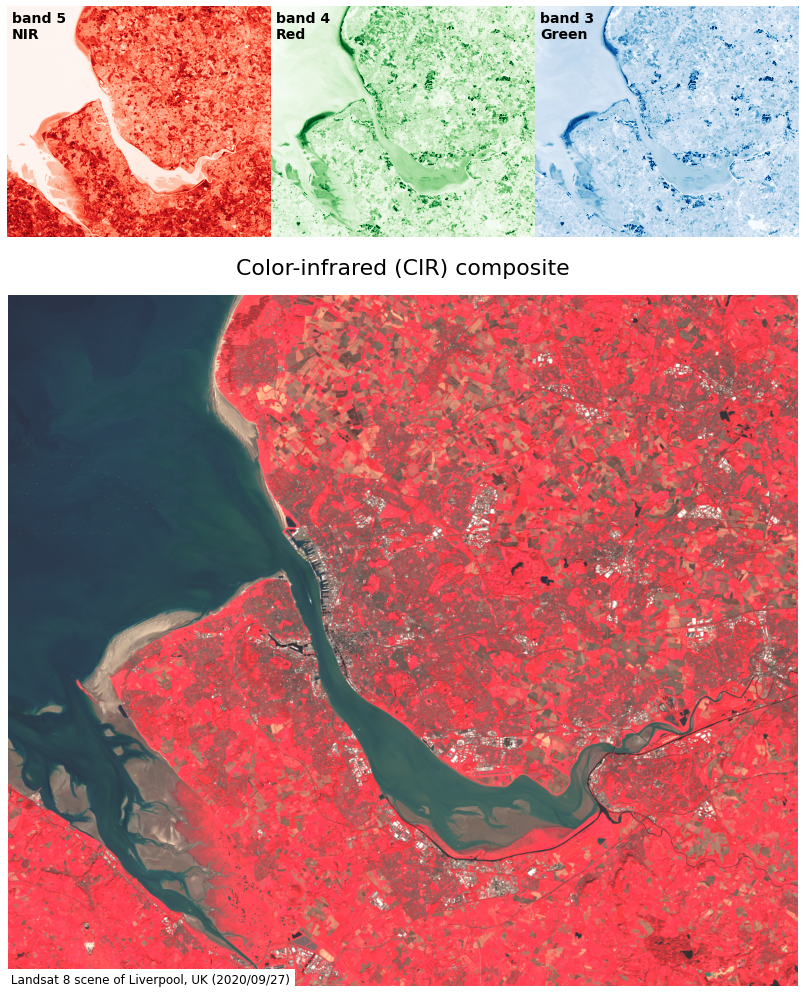

In [7]:
fig = plt.figure(figsize=(11, 14.4))
grid = GridSpec(3, 3, figure=fig, wspace=0, hspace=0)
axes =[
    fig.add_subplot(grid[0, 0]),
    fig.add_subplot(grid[0, 1]),
    fig.add_subplot(grid[0, 2]),
]
cmaps = ["Reds", "Greens", "Blues"]
for ax, band, cmap in zip(axes, [5, 4, 3], cmaps):    
    vmin, vmax = np.percentile(liverpool[band], (1, 99))
    ax.imshow(liverpool[band], cmap=cmap, vmin=vmin, vmax=vmax)
    ax.axis("off")
    ax.text(
        30, 30, 
        f"band {band}\n{band_names[band]}", 
        color="black", 
        fontweight="bold", 
        fontsize=14,
        verticalalignment="top",
    )    
ax = fig.add_subplot(grid[1:, 0:])
ax.axis("off")
ax.imshow(cir)
ax.set_title("Color-infrared (CIR) composite", fontsize=22, pad=20)

fig.text(0, 0, 
    " Landsat 8 scene of Liverpool, UK (2020/09/27)", 
    color="black", 
    fontweight="normal", 
    fontsize=12,
    verticalalignment="bottom",
    backgroundcolor="white",
)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("../lectures/images/cir-composite-liverpool.svg", bbox_inches="tight", pad_inches=0)